<a href="https://colab.research.google.com/github/ArielZeng/My-projects/blob/main/wellbeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

Link to the Wellbeing Dataset: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

People generally pursue a happy life. However, how to achieve it is a problem that needs to be considered. With the help of data analysis, I want to use this survey data to find out some answers.

This dataset is comprised of work-life balance score of 15,977 survey responses and 23 explainatory variables.

# DATA LOADING

In [ ]:
import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000,'display.max_rows',1000)
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# READ DATA

In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine=[train_df,test_df]

A brief Intro to the Data Sets:

In [ ]:
print(train_df.columns)

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'], dtype='object')


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                14371 non-null  object 
 1   FRUITS_VEGGIES           14371 non-null  int64  
 2   DAILY_STRESS             14371 non-null  int64  
 3   PLACES_VISITED           14371 non-null  int64  
 4   CORE_CIRCLE              14371 non-null  int64  
 5   SUPPORTING_OTHERS        14371 non-null  int64  
 6   SOCIAL_NETWORK           14371 non-null  int64  
 7   ACHIEVEMENT              14371 non-null  int64  
 8   DONATION                 14371 non-null  int64  
 9   BMI_RANGE                14371 non-null  int64  
 10  TODO_COMPLETED           14371 non-null  int64  
 11  FLOW                     14371 non-null  int64  
 12  DAILY_STEPS              14371 non-null  int64  
 13  LIVE_VISION              14371 non-null  int64  
 14  SLEEP_HOURS           

# EDA

Further learn about the details of every features.

In [ ]:
train_df.head(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,AGE1
0,2007/7/15,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,36 to 50,Female,609.5,3.0
1,2007/7/15,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,36 to 50,Female,655.6,3.0
2,2007/7/15,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,36 to 50,Female,631.6,3.0
3,2007/7/15,3,3,10,3,10,7,2,5,2,...,7,5,1,5,2,0,51 or more,Female,622.7,4.0
4,2007/7/15,5,1,3,3,10,4,2,4,2,...,0,0,2,8,1,5,51 or more,Female,663.9,4.0
5,2007/8/15,3,2,3,9,10,10,2,3,1,...,0,2,2,10,8,3,51 or more,Female,722.3,4.0
6,2007/8/15,4,2,10,6,10,10,3,5,2,...,10,0,2,10,8,10,51 or more,Male,727.2,4.0
7,2007/9/15,3,4,5,3,5,7,4,0,1,...,0,2,2,8,2,2,21 to 35,Female,676.2,2.0
8,2007/9/15,5,3,6,4,3,3,5,4,1,...,0,2,2,10,3,10,21 to 35,Female,702.8,2.0
9,2007/10/15,4,4,2,6,10,10,0,4,2,...,0,0,1,3,8,1,51 or more,Female,634.4,4.0


In [ ]:
train_df.GENDER.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,14371.0,2.930555,1.446968,0.0,2.0,3.0,4.0,5.0
DAILY_STRESS,14371.0,2.783314,1.371122,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,14371.0,5.299701,3.317445,0.0,3.0,5.0,8.0,10.0
CORE_CIRCLE,14371.0,5.484865,2.842875,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,14371.0,5.566071,3.247975,0.0,3.0,5.0,9.0,10.0
SOCIAL_NETWORK,14371.0,6.492102,3.086188,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,14371.0,3.970983,2.751692,0.0,2.0,3.0,6.0,10.0
DONATION,14371.0,2.695637,1.858171,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,14371.0,1.404843,0.490879,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,14371.0,5.711920,2.634065,0.0,4.0,6.0,8.0,10.0


Learn the Relationship between explainatory variables and Response "WORK_LIFE_BALANCE_SCORE".

In [ ]:
train_df[["FRUITS_VEGGIES","WORK_LIFE_BALANCE_SCORE"]].groupby(["FRUITS_VEGGIES"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,FRUITS_VEGGIES,WORK_LIFE_BALANCE_SCORE
5,5,693.775515
4,4,682.101729
3,3,669.628837
2,2,654.462128
1,1,637.968943
0,0,619.595825


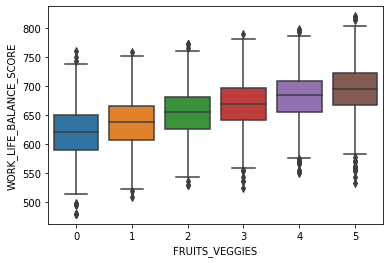

In [ ]:
sns.boxplot(x=train_df["FRUITS_VEGGIES"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["PLACES_VISITED","WORK_LIFE_BALANCE_SCORE"]].groupby(["PLACES_VISITED"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,PLACES_VISITED,WORK_LIFE_BALANCE_SCORE
10,10,697.359085
9,9,690.122363
8,8,686.008853
7,7,681.591299
6,6,674.636391
5,5,669.332660
4,4,662.212266
3,3,653.696964
2,2,643.171474
1,1,631.274978


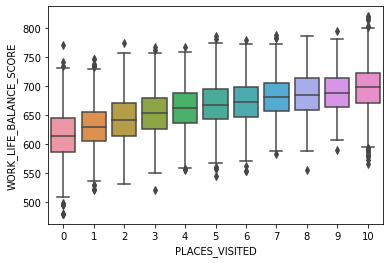

In [ ]:
sns.boxplot(x=train_df["PLACES_VISITED"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["CORE_CIRCLE","WORK_LIFE_BALANCE_SCORE"]].groupby(["CORE_CIRCLE"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,CORE_CIRCLE,WORK_LIFE_BALANCE_SCORE
10,10,700.634393
9,9,689.179755
8,8,686.226047
7,7,679.266600
6,6,673.440678
5,5,666.631143
4,4,657.448224
3,3,646.165119
2,2,634.833008
1,1,625.884954


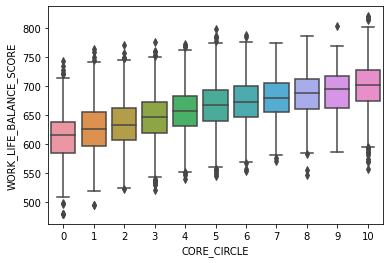

In [ ]:
sns.boxplot(x=train_df["CORE_CIRCLE"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["SUPPORTING_OTHERS","WORK_LIFE_BALANCE_SCORE"]].groupby(["SUPPORTING_OTHERS"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,SUPPORTING_OTHERS,WORK_LIFE_BALANCE_SCORE
10,10,698.462627
9,9,688.050201
8,8,684.944362
7,7,675.717968
6,6,673.758055
5,5,666.777184
4,4,659.264151
3,3,649.464119
2,2,638.824510
1,1,624.525694


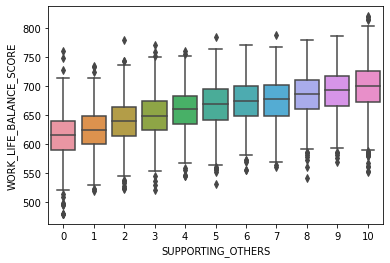

In [ ]:
sns.boxplot(x=train_df["SUPPORTING_OTHERS"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["ACHIEVEMENT","WORK_LIFE_BALANCE_SCORE"]].groupby(["ACHIEVEMENT"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,ACHIEVEMENT,WORK_LIFE_BALANCE_SCORE
10,10,718.446641
9,9,706.334112
8,8,700.908940
7,7,692.033983
6,6,683.356976
5,5,681.177476
4,4,670.216262
3,3,661.500870
2,2,650.335222
1,1,634.573529


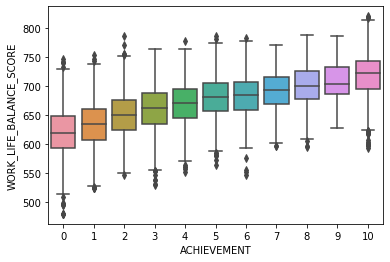

In [ ]:
sns.boxplot(x=train_df["ACHIEVEMENT"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["DONATION","WORK_LIFE_BALANCE_SCORE"]].groupby(["DONATION"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,DONATION,WORK_LIFE_BALANCE_SCORE
5,5,691.934771
4,4,678.563755
3,3,671.114410
2,2,660.379788
1,1,649.334248
0,0,633.982276


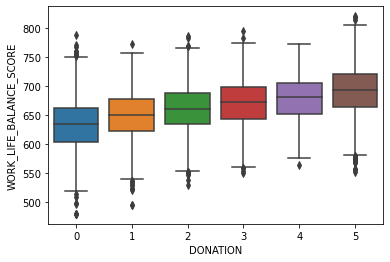

In [ ]:
sns.boxplot(x=train_df["DONATION"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["TODO_COMPLETED","WORK_LIFE_BALANCE_SCORE"]].groupby(["TODO_COMPLETED"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,TODO_COMPLETED,WORK_LIFE_BALANCE_SCORE
10,10,702.543282
9,9,697.884468
8,8,688.849696
7,7,678.960159
6,6,670.199269
5,5,661.179525
4,4,649.787107
3,3,641.524457
2,2,632.529840
1,1,619.430055


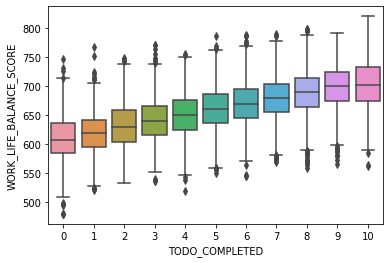

In [ ]:
sns.boxplot(x=train_df["TODO_COMPLETED"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["FLOW","WORK_LIFE_BALANCE_SCORE"]].groupby(["FLOW"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,FLOW,WORK_LIFE_BALANCE_SCORE
10,10,722.509000
9,9,712.407031
8,8,705.055702
7,7,697.982261
6,6,690.200442
5,5,684.843237
4,4,677.014173
3,3,669.774176
2,2,660.830460
1,1,646.789171


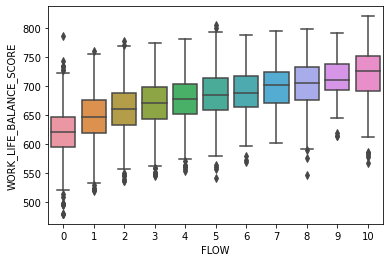

In [ ]:
sns.boxplot(x=train_df["FLOW"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["DAILY_STEPS","WORK_LIFE_BALANCE_SCORE"]].groupby(["DAILY_STEPS"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,DAILY_STEPS,WORK_LIFE_BALANCE_SCORE
9,10,691.634315
8,9,688.461732
7,8,681.587899
6,7,677.326027
5,6,671.237535
4,5,664.285010
3,4,658.391709
2,3,649.907475
1,2,642.603270
0,1,626.943180


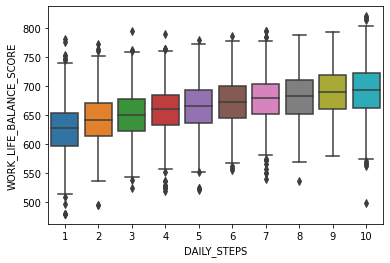

In [ ]:
sns.boxplot(x=train_df["DAILY_STEPS"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["SUFFICIENT_INCOME","WORK_LIFE_BALANCE_SCORE"]].groupby(["SUFFICIENT_INCOME"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,SUFFICIENT_INCOME,WORK_LIFE_BALANCE_SCORE
1,2,677.755461
0,1,636.719597


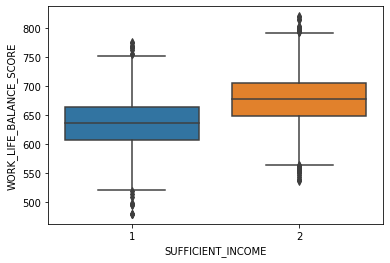

In [ ]:
sns.boxplot(x=train_df["SUFFICIENT_INCOME"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["PERSONAL_AWARDS","WORK_LIFE_BALANCE_SCORE"]].groupby(["PERSONAL_AWARDS"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,PERSONAL_AWARDS,WORK_LIFE_BALANCE_SCORE
10,10,696.539776
9,9,690.978176
8,8,685.236062
7,7,676.283735
6,6,668.586204
5,5,664.141440
4,4,657.829267
3,3,646.645282
2,2,637.312540
1,1,628.135552


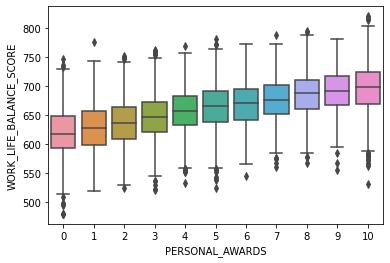

In [ ]:
sns.boxplot(x=train_df["PERSONAL_AWARDS"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["TIME_FOR_PASSION","WORK_LIFE_BALANCE_SCORE"]].groupby(["TIME_FOR_PASSION"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,TIME_FOR_PASSION,WORK_LIFE_BALANCE_SCORE
10,10,717.660855
9,9,704.208187
8,8,701.650852
7,7,697.375986
6,6,687.982312
5,5,685.502081
4,4,676.576327
3,3,670.469852
2,2,661.752424
1,1,648.704122


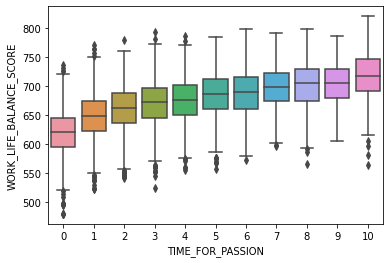

In [ ]:
sns.boxplot(x=train_df["TIME_FOR_PASSION"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["WEEKLY_MEDITATION","WORK_LIFE_BALANCE_SCORE"]].groupby(["WEEKLY_MEDITATION"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
10,10,686.457067
9,9,681.124872
8,8,679.393559
7,7,673.510161
6,6,669.642918
5,5,663.329392
4,4,655.813570
3,3,648.575417
2,2,640.293245
1,1,624.621835


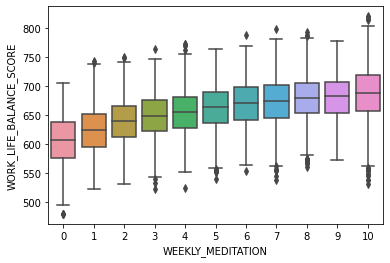

In [ ]:
sns.boxplot(x=train_df["WEEKLY_MEDITATION"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["LIVE_VISION","WORK_LIFE_BALANCE_SCORE"]].groupby(["LIVE_VISION"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,LIVE_VISION,WORK_LIFE_BALANCE_SCORE
9,9,703.712632
10,10,701.101173
8,8,690.696040
7,7,689.698310
6,6,685.096814
5,5,680.842230
4,4,671.048562
3,3,669.153117
2,2,661.305137
1,1,649.135633


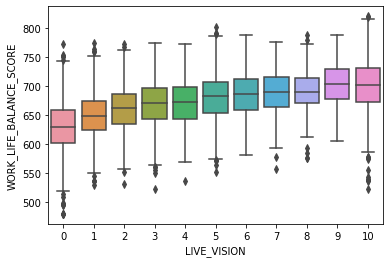

In [ ]:
sns.boxplot(x=train_df["LIVE_VISION"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["SOCIAL_NETWORK","WORK_LIFE_BALANCE_SCORE"]].groupby(["SOCIAL_NETWORK"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,SOCIAL_NETWORK,WORK_LIFE_BALANCE_SCORE
10,10,685.780036
8,8,678.689945
9,9,673.691333
7,7,672.240114
6,6,667.939836
5,5,663.366337
4,4,651.794118
3,3,648.150386
2,2,635.851186
1,1,622.217296


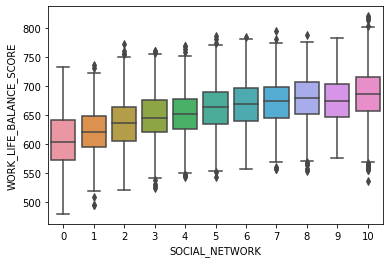

In [ ]:
sns.boxplot(x=train_df["SOCIAL_NETWORK"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

It shows that "WORK_LIFE_BALANCE_SCORE" has a positive linear relation with "FRUITS_VEGGIES", "DAILY_STRESS", "PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS", "ACHIEVEMENT", "DONATION", "TODO_COMPLETED", "FLOW", "DAILY_STEPS", "SUFFICIENT_INCOME","PERSONAL_AWARDS","TIME_FOR_PASSION","WEEKLY_MEDITATION", "LIVE_VISION","	SOCIAL_NETWORK".

In [ ]:
train_df[["DAILY_STRESS","WORK_LIFE_BALANCE_SCORE"]].groupby(["DAILY_STRESS"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,DAILY_STRESS,WORK_LIFE_BALANCE_SCORE
0,0,695.964342
1,1,686.377311
2,2,676.604412
3,3,666.811506
4,4,652.141834
5,5,635.704676


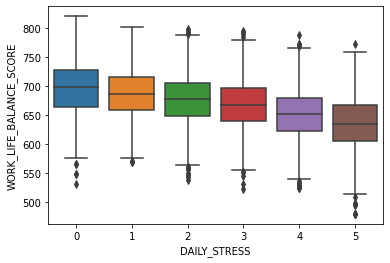

In [ ]:
sns.boxplot(x=train_df["DAILY_STRESS"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["BMI_RANGE","WORK_LIFE_BALANCE_SCORE"]].groupby(["BMI_RANGE"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,BMI_RANGE,WORK_LIFE_BALANCE_SCORE
0,1,676.213048
1,2,652.345961


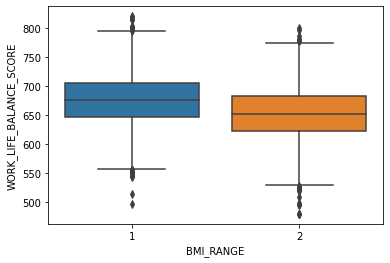

In [ ]:
sns.boxplot(x=train_df["BMI_RANGE"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

In [ ]:
train_df[["DAILY_SHOUTING","WORK_LIFE_BALANCE_SCORE"]].groupby(["DAILY_SHOUTING"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,DAILY_SHOUTING,WORK_LIFE_BALANCE_SCORE
0,0,677.213852
1,1,677.187841
2,2,672.229987
3,3,666.607596
4,4,660.305804
5,5,656.651155
6,6,653.821721
7,7,646.514286
8,8,641.565179
9,9,634.237209


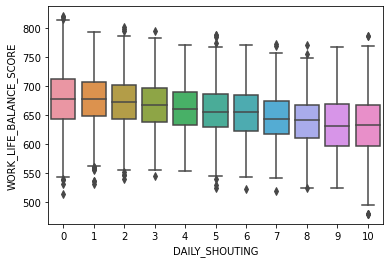

In [ ]:
sns.boxplot(x=train_df["DAILY_SHOUTING"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

It shows that "WORK_LIFE_BALANCE_SCORE" has a negetive linear relation with "DAILY_STRESS", "BMI_RANGE", "DAILY_SHOUTING".

In [ ]:
train_df[["LOST_VACATION","WORK_LIFE_BALANCE_SCORE"]].groupby(["LOST_VACATION"], as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,LOST_VACATION,WORK_LIFE_BALANCE_SCORE
0,0,677.124578
2,2,667.151609
1,1,666.610450
3,3,662.494840
4,4,660.170715
5,5,658.503294
6,6,653.108852
8,8,652.061976
7,7,650.687736
10,10,645.096064


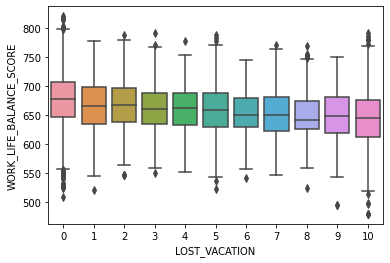

In [ ]:
sns.boxplot(x=train_df["LOST_VACATION"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

Although some parts show the linear relation between "WORK_LIFE_BALANCE_SCORE" and "LOST_VACATION", when "LOST_VACATION" is 1 and 2, 8 and 7, 10 and 9, their corresponding "WORK_LIFE_BALANCE_SCORE" dosen't show the linear relation.

In [ ]:
train_df[["SLEEP_HOURS","WORK_LIFE_BALANCE_SCORE"]].groupby(["SLEEP_HOURS"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,SLEEP_HOURS,WORK_LIFE_BALANCE_SCORE
7,8,676.974056
6,7,670.817999
8,9,669.120559
9,10,658.175585
5,6,656.975196
4,5,645.571632
3,4,632.537826
2,3,610.420455
1,2,601.727778
0,1,575.705556


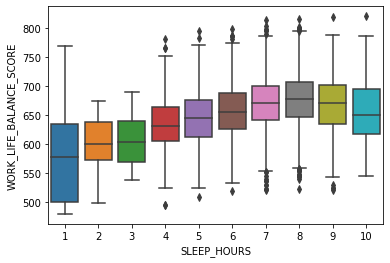

In [ ]:
sns.boxplot(x=train_df["SLEEP_HOURS"],y=train_df["WORK_LIFE_BALANCE_SCORE"])

It shows that as "SLEEP_HOURS" is less, "WORK_LIFE_BALANCE_SCORE" is lower. When "SLEEP_HOURS" equals 8, the score becomes highest. But as "SLEEP_HOURS" gets more, the score goes down.

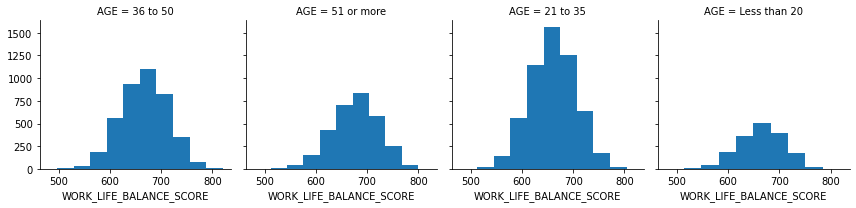

In [ ]:
g=sns.FacetGrid(train_df,col="AGE")
g.map(plt.hist,"WORK_LIFE_BALANCE_SCORE")

In [ ]:
train_df[["AGE","WORK_LIFE_BALANCE_SCORE"]].groupby(["AGE"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,AGE,WORK_LIFE_BALANCE_SCORE
2,51 or more,677.018934
1,36 to 50,667.172132
3,Less than 20,664.470006
0,21 to 35,660.919597


It shows that as someone gets older who is more than 36 years old, he/she gets much more possibility to become happy. Also people who are less than 20 years old is happier than people who is 21 to 35 years old.

In [ ]:
train_df[["GENDER","WORK_LIFE_BALANCE_SCORE"]].groupby(["GENDER"],as_index=False).mean().sort_values(by="WORK_LIFE_BALANCE_SCORE",ascending=False)

,GENDER,WORK_LIFE_BALANCE_SCORE
0,Female,668.111918
1,Male,664.107389


It shows that female is happier than male.

# MISSING DATA

In [ ]:
percent_missing=train_df.isnull().sum()/len(train_df)
missing_value_train_df=pd.DataFrame({'percent_missing':percent_missing})
missing_value_train_df

,percent_missing
Timestamp,0.0
FRUITS_VEGGIES,0.0
DAILY_STRESS,0.0
PLACES_VISITED,0.0
CORE_CIRCLE,0.0
SUPPORTING_OTHERS,0.0
SOCIAL_NETWORK,0.0
ACHIEVEMENT,0.0
DONATION,0.0
BMI_RANGE,0.0


# DETECT THE COLLINEARITY BETWEEN COVARIATES

I use sexencode to gender and apply ageencode to age to change the categorical variables to numerical ones.

In [ ]:
def sexEncode(gender):
  if gender=="Male":
    return 1
  elif gender=="Female":
    return 2

In [ ]:
for dataset in combine:
  dataset["GENDER"]=dataset["GENDER"].apply(sexEncode).values.astype("int")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                14371 non-null  object 
 1   FRUITS_VEGGIES           14371 non-null  int64  
 2   DAILY_STRESS             14371 non-null  int64  
 3   PLACES_VISITED           14371 non-null  int64  
 4   CORE_CIRCLE              14371 non-null  int64  
 5   SUPPORTING_OTHERS        14371 non-null  int64  
 6   SOCIAL_NETWORK           14371 non-null  int64  
 7   ACHIEVEMENT              14371 non-null  int64  
 8   DONATION                 14371 non-null  int64  
 9   BMI_RANGE                14371 non-null  int64  
 10  TODO_COMPLETED           14371 non-null  int64  
 11  FLOW                     14371 non-null  int64  
 12  DAILY_STEPS              14371 non-null  int64  
 13  LIVE_VISION              14371 non-null  int64  
 14  SLEEP_HOURS           

In [ ]:
train_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2007/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,2,609.5
1,2007/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,2,655.6
2,2007/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,2,631.6
3,2007/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,2,622.7
4,2007/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,2,663.9


In [ ]:
def ageencode(age):
  if age == "Less than 20":
    return 1
  elif age == "21 to 35":
    return 2
  elif age == "36 to 50":
    return 3
  elif age== "51 or more":
    return 4

In [ ]:
for dataset in combine:
  dataset["AGE"]=dataset["AGE"].apply(ageencode).values.astype("int")

In [ ]:
train_df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2007/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,3,2,609.5
1,2007/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,3,2,655.6
2,2007/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,3,2,631.6
3,2007/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,4,2,622.7
4,2007/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,4,2,663.9


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                14371 non-null  object 
 1   FRUITS_VEGGIES           14371 non-null  int64  
 2   DAILY_STRESS             14371 non-null  int64  
 3   PLACES_VISITED           14371 non-null  int64  
 4   CORE_CIRCLE              14371 non-null  int64  
 5   SUPPORTING_OTHERS        14371 non-null  int64  
 6   SOCIAL_NETWORK           14371 non-null  int64  
 7   ACHIEVEMENT              14371 non-null  int64  
 8   DONATION                 14371 non-null  int64  
 9   BMI_RANGE                14371 non-null  int64  
 10  TODO_COMPLETED           14371 non-null  int64  
 11  FLOW                     14371 non-null  int64  
 12  DAILY_STEPS              14371 non-null  int64  
 13  LIVE_VISION              14371 non-null  int64  
 14  SLEEP_HOURS           

I use corr and heatmap to find the covariables, but there is none.

In [ ]:
train_df.corr()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,-0.095731,0.254324,0.159527,0.208099,0.104738,0.167629,0.200308,-0.095423,0.226411,0.135267,0.247042,0.113895,0.107516,-0.069536,-0.077519,0.147396,0.165496,0.169245,0.193608,0.177880,0.117921,0.452282
DAILY_STRESS,-0.095731,1.000000,-0.131919,-0.118956,-0.034726,0.016945,-0.115728,-0.039271,0.083819,-0.166267,-0.130840,-0.062110,-0.137226,-0.152180,0.194412,0.304381,-0.148576,-0.045363,-0.158331,-0.218596,-0.022268,0.128087,-0.366715
PLACES_VISITED,0.254324,-0.131919,1.000000,0.258386,0.246744,0.152698,0.260417,0.208235,-0.108870,0.230960,0.147733,0.198842,0.146671,0.129213,-0.128973,-0.091884,0.175945,0.271602,0.190837,0.205645,0.003539,0.053168,0.533146
CORE_CIRCLE,0.159527,-0.118956,0.258386,1.000000,0.337981,0.307970,0.290219,0.219849,-0.029469,0.224087,0.240163,0.148332,0.222036,0.062490,-0.084259,-0.073525,0.124255,0.249698,0.227590,0.104418,0.003838,0.096044,0.507576
SUPPORTING_OTHERS,0.208099,-0.034726,0.246744,0.337981,1.000000,0.311614,0.359867,0.392657,0.029008,0.252980,0.273553,0.144111,0.237658,0.008081,-0.022717,-0.056441,0.111770,0.332013,0.326196,0.143603,0.187211,0.129882,0.549985
SOCIAL_NETWORK,0.104738,0.016945,0.152698,0.307970,0.311614,1.000000,0.249433,0.151461,0.014375,0.207926,0.242056,0.211394,0.185683,-0.030847,0.014591,-0.007147,0.124854,0.207860,0.197524,-0.010439,-0.058147,0.043977,0.411396
ACHIEVEMENT,0.167629,-0.115728,0.260417,0.290219,0.359867,0.249433,1.000000,0.238516,-0.030818,0.308786,0.388453,0.187890,0.318939,0.048205,-0.003525,-0.055110,0.115858,0.397198,0.370720,0.167682,0.004506,-0.000082,0.566517
DONATION,0.200308,-0.039271,0.208235,0.219849,0.392657,0.151461,0.238516,1.000000,0.060331,0.196034,0.169807,0.111509,0.163238,0.000641,-0.023924,-0.051037,0.118492,0.275741,0.189578,0.144929,0.229092,0.123442,0.458191
BMI_RANGE,-0.095423,0.083819,-0.108870,-0.029469,0.029008,0.014375,-0.030818,0.060331,1.000000,-0.068241,0.017295,-0.133228,-0.005514,-0.099479,0.034355,0.058462,-0.014762,0.016466,-0.021085,-0.077204,0.199463,0.009399,-0.259107
TODO_COMPLETED,0.226411,-0.166267,0.230960,0.224087,0.252980,0.207926,0.308786,0.196034,-0.068241,1.000000,0.300728,0.202310,0.276019,0.113345,-0.077589,-0.141530,0.205793,0.247707,0.277118,0.178916,0.096593,0.088881,0.547889


<Figure size 1440x1440 with 0 Axes>

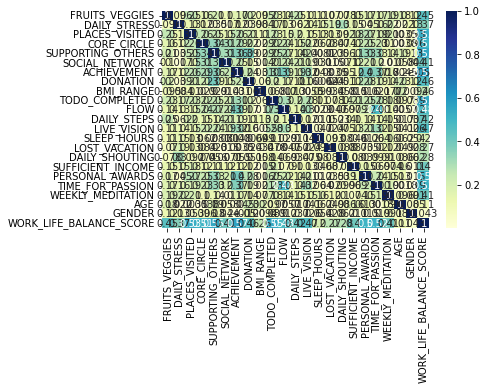

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.heatmap(np.abs(train_df.corr()),annot=True,cmap='YlGnBu', xticklabels=1, yticklabels=1)
plt.figure(figsize=[20,20])

# FEATURE ENDINEERING

It shows that "LOST_VACATION" and "Timestamp" have no strong relation with "WORK_LIFE_BALANCE_SCORE" seperately, so drop them.

In [ ]:
train_df=train_df.drop(["LOST_VACATION","Timestamp"], axis=1)
test_df=test_df.drop(["LOST_VACATION","Timestamp"], axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14371 entries, 0 to 14370
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           14371 non-null  int64  
 1   DAILY_STRESS             14371 non-null  int64  
 2   PLACES_VISITED           14371 non-null  int64  
 3   CORE_CIRCLE              14371 non-null  int64  
 4   SUPPORTING_OTHERS        14371 non-null  int64  
 5   SOCIAL_NETWORK           14371 non-null  int64  
 6   ACHIEVEMENT              14371 non-null  int64  
 7   DONATION                 14371 non-null  int64  
 8   BMI_RANGE                14371 non-null  int64  
 9   TODO_COMPLETED           14371 non-null  int64  
 10  FLOW                     14371 non-null  int64  
 11  DAILY_STEPS              14371 non-null  int64  
 12  LIVE_VISION              14371 non-null  int64  
 13  SLEEP_HOURS              14371 non-null  int64  
 14  DAILY_SHOUTING        

# MODELING

In [ ]:
X_train = train_df.drop("WORK_LIFE_BALANCE_SCORE", axis=1)
Y_train = train_df["WORK_LIFE_BALANCE_SCORE"]

X_test  = test_df.copy().drop("WORK_LIFE_BALANCE_SCORE", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((14371, 21), (14371,), (1601, 21))

Because Y_train is numerical, I use linear regression, decision tree, random forest and KNN to fit the data and rank their accuracy.

In [ ]:
# Linear Regression
lr=LinearRegression()
lr.fit(X_train, Y_train)
y_Pred=lr.predict(X_test)
acc_lr=lr.score(X_train, Y_train)
acc_lr

0.9820788963956485

In [ ]:
acc_lr1=lr.score(X_test, y_Pred)
acc_lr1

1.0

In [ ]:
# Decision Tree
decision_tree=DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train.astype('int'))
y_pred=decision_tree.predict(X_test)
acc_decision_tree=decision_tree.score(X_train, Y_train.astype('int'))
acc_decision_tree1=decision_tree.score(X_test, y_pred.astype("int"))
acc_decision_tree

0.9999961714601641

In [ ]:
acc_decision_tree1

1.0

In [ ]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, Y_train.astype('int'))
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train.astype('int'))
acc_random_forest = random_forest.score(X_train, Y_train.astype('int'))
acc_random_forest

0.9904099191028097

In [ ]:
acc_random_forest1=random_forest.score(X_test, y_pred.astype("int"))
acc_random_forest1

0.9997659080811103

In [ ]:
#KNN
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)
acc_knn

0.932884769796098

In [ ]:
acc_knn1=knn.score(X_test,y_pred)
acc_knn1

0.8181906441311579

Sort the accuracy of train data and test data of each model separately.

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Linear Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_lr, 
              acc_random_forest, 
              acc_decision_tree],
    "Score1": [ acc_knn1, acc_lr1, 
              acc_random_forest1, 
              acc_decision_tree1]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Score1
3,Decision Tree,0.999996,1.000000
2,Random Forest,0.990413,0.999767
1,Linear Regression,0.982079,1.000000
0,KNN,0.932885,0.818191


I prefer the Random Forest Model for the reason that the accuracy of train data and test data is high, their accuracy are closer and I can find the important features by Random Forest. 

find some important features

In [ ]:
from sklearn import ensemble
featureArray=["FRUITS_VEGGIES","DAILY_STRESS","PLACES_VISITED","CORE_CIRCLE","SUPPORTING_OTHERS","SOCIAL_NETWORK","ACHIEVEMENT","DONATION","BMI_RANGE","TODO_COMPLETED","FLOW","DAILY_STEPS","LIVE_VISION","SLEEP_HOURS","DAILY_SHOUTING","SUFFICIENT_INCOME","PERSONAL_AWARDS","TIME_FOR_PASSION","WEEKLY_MEDITATION","AGE","GENDER"]
x=train_df[featureArray]
y=train_df["WORK_LIFE_BALANCE_SCORE"]
rf=ensemble.RandomForestRegressor()
rf.fit(x, y)
print("特征重要性："+str(rf.feature_importances_))

特征重要性：[0.02539268 0.02316153 0.12487796 0.03591518 0.16010735 0.01690368
 0.11884496 0.02279965 0.02833607 0.14887106 0.01696189 0.03079745
 0.03703864 0.00662862 0.01905087 0.06796587 0.0275796  0.0442188
 0.03973682 0.00333271 0.0014786 ]


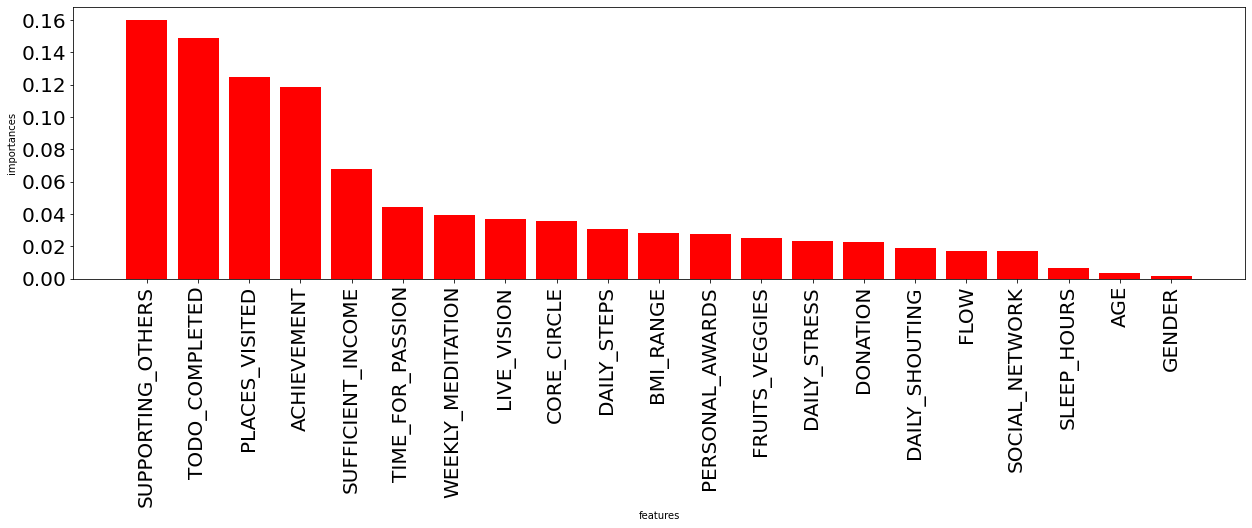

In [ ]:
FI=pd.Series(rf.feature_importances_, index=featureArray)
FI=FI.sort_values(ascending=False)
fig=plt.figure(figsize=(21,5))
plt.bar(FI.index,FI.values,color="red")
plt.xlabel("features")
plt.ylabel("importances")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation = 90)
plt.show()

four important features are "SUPPORTING_OTHERS", "TODO_COMPLETED", "PLACES_VISITED" and "ACHIEVEMENT"

# CONCLUSION

According to a series of steps, I find that all the features above can be the reason to influence wellbeing:

1. someone do the following things more, he/she is more likely to get the balance between life and work:

eat fruit and vegetable; visit places; make friends; help others; make achievements; donate something; complete plans on time; focus on the present; walk; sufficient income or reduce some wants if income is not enough; receive personal awards deservedly; spend time on hobbies; mediation; have clear vision in the closer years; spend time on social network.

2. Please do less following things to be more likely to get wellbeing:

increase overdue stress; gain weight; shouting.

3. sleep for 8 hours, no less and no more.

4. To become well-being, we should help others often, be efficient to finish plan; travel and make more achivements.